In [9]:
library(ggplot2)
library(prophet)
library(tidyverse)
library(cowplot)
library(MLmetrics)

In [11]:
c1 <- read_csv("org_hy.csv")

Parsed with column specification:
cols(
  dates = col_date(format = ""),
  Year = col_double(),
  Month = col_double(),
  Day = col_double(),
  Hour = col_double(),
  AQI = col_double()
)


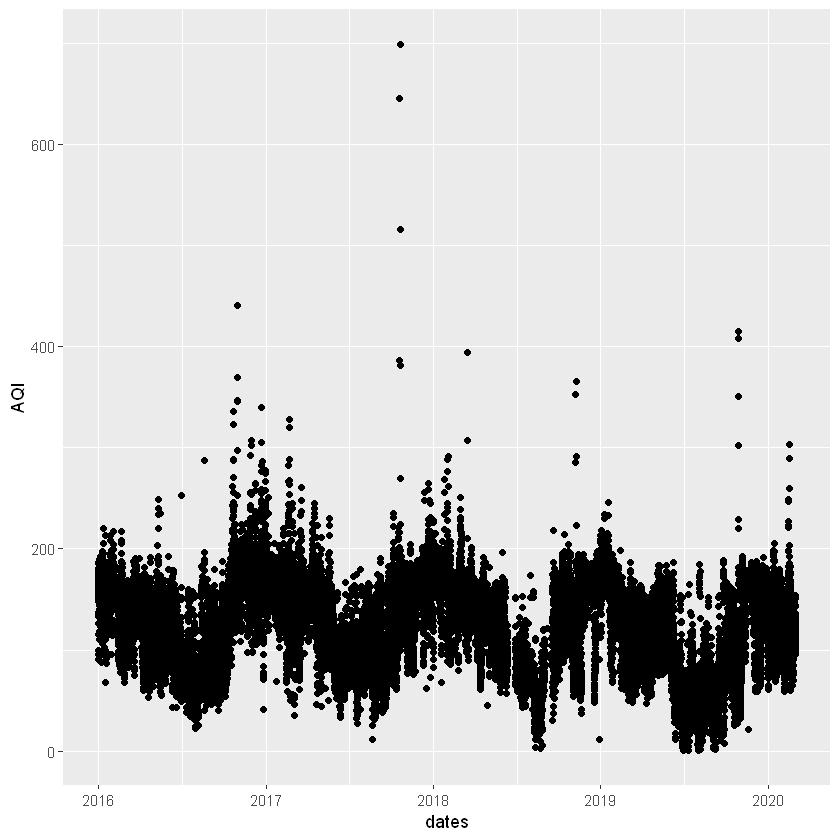

In [12]:
qplot(dates, AQI, data = c1)

In [13]:
#store date to ds and log of AQi to y
ds <- c1$dates
y <- c1$AQI

In [14]:
df <- data.frame(ds, y)

In [15]:
m <- prophet(df)

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.


In [17]:
future <- make_future_dataframe(m, periods = 14)

In [18]:
tail(future)

,ds
34816,2020-03-10
34817,2020-03-11
34818,2020-03-12
34819,2020-03-13
34820,2020-03-14
34821,2020-03-15


In [19]:
forecast <- predict(m, future)

In [20]:
tail(forecast[c('ds', 'yhat', 'yhat_lower', 'yhat_upper')])

,ds,yhat,yhat_lower,yhat_upper
34816,2020-03-10,107.2613,70.66739,143.2560
34817,2020-03-11,111.3607,73.54630,148.3775
34818,2020-03-12,111.7641,73.38325,150.1901
34819,2020-03-13,111.5753,77.96613,148.0044
34820,2020-03-14,111.7396,77.95147,148.1321
34821,2020-03-15,112.8920,74.74249,147.8389


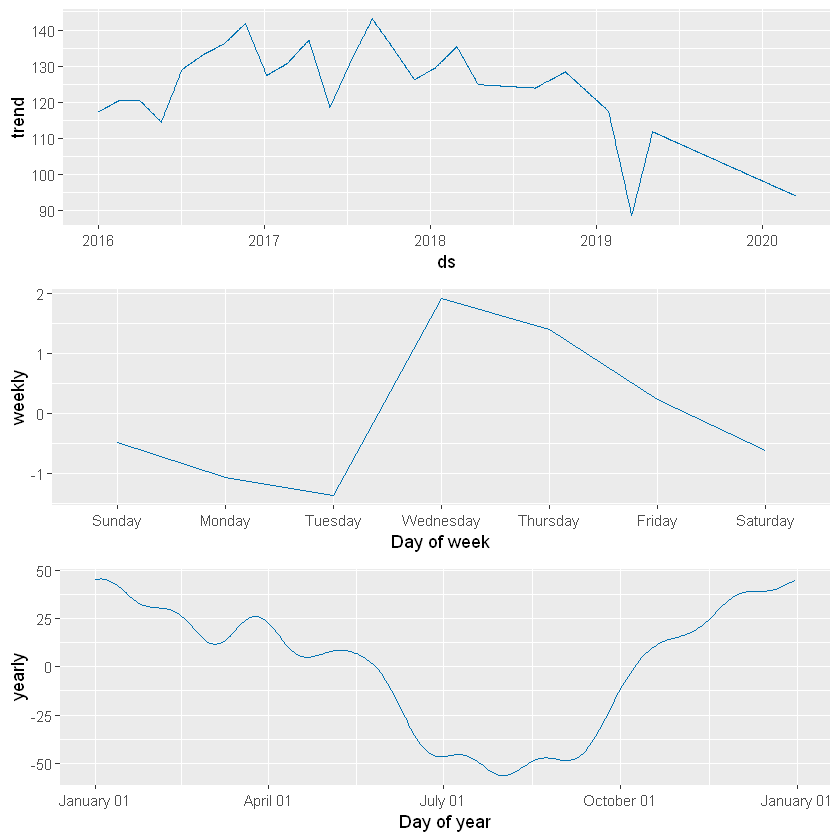

In [21]:
prophet_plot_components(m, forecast)

In [22]:
RMSE(forecast$yhat, y)

Warning message in y_true - y_pred:
"longer object length is not a multiple of shorter object length"

[1] 28.29346

In [ ]:
plot(m, forecast)